In [1]:
# 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 받기
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

In [3]:
# 데이터 확인
print(data.head())
print(data.tail())
print(data.info())

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]
           0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
372445  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446  25.

In [4]:
# 데이터셋을 X와 y 로 나누기
data.rename(columns={'0': 'label'}, inplace=True)
X = data.drop('label', axis=1)
y = data['label']

In [5]:
# 나눈 데이터 크기 확인
print(X.shape, y.shape)

(372450, 784) (372450,)


In [6]:
# 데이터 셔플
X_shuffle = shuffle(X)

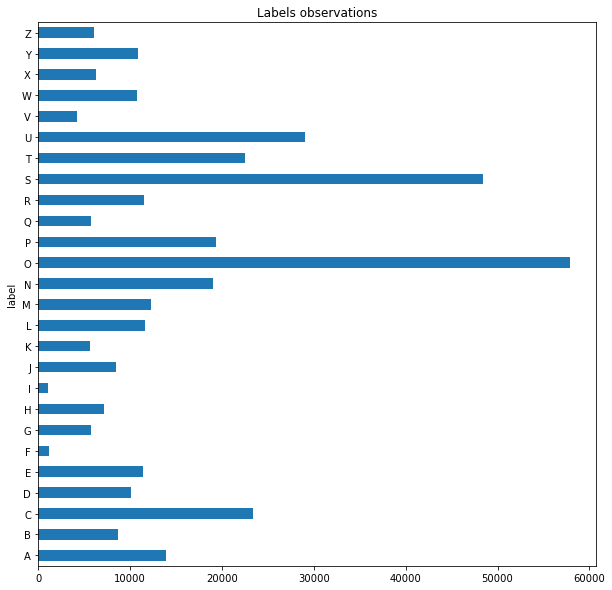

In [7]:
# 데이터 내에 분포 확인
alphabets = {0:'A', 1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
             7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
             14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',
             20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
dataset_alphabets = data.copy()
data['label'] = data['label'].map(alphabets)

label_size = data.groupby('label').size()
label_size.plot.barh(figsize=(10, 10))
plt.title('Labels observations')
plt.show()

In [8]:
# 데이터 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)
train_scaled[0][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
# 데이터 reshape
train_scaled = train_scaled.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
test_scaled = test_scaled.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [10]:
# y 데이터 convert
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
# CNN 모델링
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                        

In [12]:
# CNN 학습
history = model.fit(train_scaled, y_train, validation_data=(test_scaled, y_test), epochs=5, batch_size=200, verbose=2)

Epoch 1/5
1397/1397 - 96s - loss: 0.2390 - accuracy: 0.9337 - val_loss: 0.0960 - val_accuracy: 0.9735 - 96s/epoch - 69ms/step
Epoch 2/5
1397/1397 - 93s - loss: 0.0886 - accuracy: 0.9753 - val_loss: 0.0721 - val_accuracy: 0.9804 - 93s/epoch - 67ms/step
Epoch 3/5
1397/1397 - 105s - loss: 0.0669 - accuracy: 0.9810 - val_loss: 0.0604 - val_accuracy: 0.9842 - 105s/epoch - 75ms/step
Epoch 4/5
1397/1397 - 108s - loss: 0.0550 - accuracy: 0.9838 - val_loss: 0.0510 - val_accuracy: 0.9861 - 108s/epoch - 78ms/step
Epoch 5/5
1397/1397 - 103s - loss: 0.0450 - accuracy: 0.9867 - val_loss: 0.0467 - val_accuracy: 0.9873 - 103s/epoch - 74ms/step


In [13]:
# CNN score
scores = model.evaluate(test_scaled, y_test, verbose=0)
print('CNN score: ', scores[1])

CNN score:  0.9873379468917847


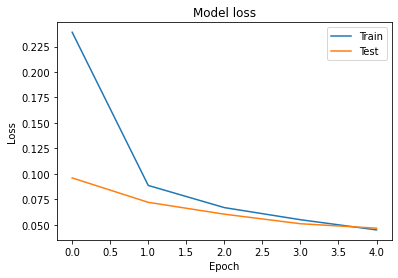

In [14]:
# loss 값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

### 예측

In [15]:
# 예측할 이미지 불러오기
img_path = 'TEST_BLACK\A.jpg'
img = cv2.imread(img_path)

In [16]:
# 불러온 이미지를 모델에 적용할 수있게 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (28, 28))
img = img.reshape(1, 28, 28, 1) / 255.0

In [17]:
# 예측
predictions = model.predict(img)

1/1 [==============================] - 0s 131ms/step


In [18]:
# 예측 결과 출력
predicted_label = np.argmax(predictions, axis=1)
predicted_alphabet = alphabets[predicted_label[0]]
print('Predicted Label:', predicted_alphabet)

Predicted Label: A


In [19]:
# 입력 이미지 출력
img_input = cv2.resize(cv2.imread(img_path), (400, 440))
cv2.imshow('Input Image', img_input)

In [20]:
# 예측결과 출력
text = f'Prediction: {predicted_alphabet}'
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 2
text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
text_width, text_height = text_size
text_x = int(img_input.shape[1] / 2 - text_width / 2)
text_y = img_input.shape[0] - text_height - 10
cv2.putText(img_input, text, (text_x, text_y), font, font_scale, (0, 255, 0), thickness)

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [21]:
# 이미지 출력
cv2.imshow('Output Image', img_input)

cv2.waitKey(0)
cv2.destroyAllWindows()